Name: Joaquin Quintana

Date: 09.30.21

# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

In [1]:
# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
        #print('Worst Case Array',a)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    #print('Random array', a)
    return a

In [2]:
#helper function for testing codes and graphs
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

import random
def tests_BubbleSort(sortingAlogirthm,boolean,title):


    # CODE TO GENERATE WORST CASE
    array_sizes = range(5, 100, 5)

    # Code for creating an already sorted array
    def create_ascending_sorted_array(a_size):
        a = []
        for i in range(a_size):
            a.append(i)
            #print('Worst Case Array',a)
        return a

    # Code for creating a random array
    def create_random_shuffled_array(a_size):
        a = list(range(a_size))
        random.shuffle(a)
        #print('Random array', a)
        return a

    # Code for running sorting and generating number of compares
    num_compares_wc = []
    for n in array_sizes:
        a = create_ascending_sorted_array(n)
        nc = sortingAlogirthm(a,boolean)
        num_compares_wc.append(nc)

    # Randomized comparisons
    num_compares_random = []
    num_trials = 1000
    for n in array_sizes:
        total = 0
        for m in range(num_trials):
            a = create_random_shuffled_array(n)
            nc = sortingAlogirthm(a,boolean)
            total = total + nc
        avg = total / num_trials
        num_compares_random.append(avg)
    # Code for plotting
    title = title
    
    if boolean == 1:
        case = 'Best Case'
        brk = 'Break Implemented'
    else: 
        case = 'Worst Case'
        
    plt.plot(array_sizes, num_compares_wc, label=case)
    plt.plot(array_sizes, num_compares_random, label='Average Case')
    plt.legend([case, 'Average Case'])
    plt.title(title +'(' +case+ ' and Average Cases)')
    plt.xlabel('Array Size')
    plt.ylabel('Number of Comparisons')

    plt.show()

In [3]:
#helper function for testing codes and graphs
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

import random
def tests(sortingAlogirthm,title):


    # CODE TO GENERATE WORST CASE
    array_sizes = range(5, 100, 5)


    # Code for running sorting and generating number of compares
    num_compares_wc = []
    for n in array_sizes:
        a = create_ascending_sorted_array(n)
        nc = sortingAlogirthm(a)
        num_compares_wc.append(nc)

    # Randomized comparisons
    num_compares_random = []
    num_trials = 1000
    for n in array_sizes:
        total = 0
        for m in range(num_trials):
            a = create_random_shuffled_array(n)
            nc = sortingAlogirthm(a)
            total = total + nc
        avg = total / num_trials
        num_compares_random.append(avg)
    # Code for plotting

    plt.plot(array_sizes, num_compares_wc, label='Worst Case')
    plt.plot(array_sizes, num_compares_random, label='Average Case')
    plt.legend(['Worst Case', 'Average Case'])
    plt.title(title +' (Worst and Average Cases)')
    plt.xlabel('Array Size')
    plt.ylabel('Number of Comparisons')

    plt.show()

----
## Simple Sort

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [5]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

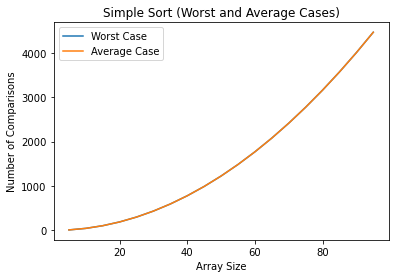

In [6]:
tests(simple_sort,'Simple Sort')

----

### Bubble Sort

In [7]:
#BUBBLE SORT n^2 unless break is added. 
def bubble_sort(a,*args):
    #outer and inner loop run run n times giving us O(n^2)
    # decrement outer loop each time 
    
    if not args:
        boolean = 0
    else:
         boolean = args[0]

    
    num_compares  = 0
    for i in range(len(a)-1, 0, -1):
        #optional break for bubble sort. 
        if boolean == 1:
            flag = False
            
        # examine each item pair
        for j in range(i):
            #count the number of times we execute 
            num_compares += 1
            # swap
            if a[j] > a[j+1]:
                temp = a[j]
                a[j] = a[j+1]
                a[j+1] = temp 
                #check if user wants to use break 
                if boolean == 1:
                    flag = True
        if boolean == 1:
        #if no swaps were made we have a sorted array and can exit
            if(flag == False):
                break
    return num_compares

In [8]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
#run bubble sort with no break
nc = bubble_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity Analysis of Bubble Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Note that bubble sort consists of two loops and in the worst case we run the first loop n times and the second loop $n-i-1$ where i is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$. If the break is present and if anyswaps aren't made we can make bubble sort run in the best case in $\Theta(n)$ time, but this is not useful. I have added this just to see what it looks like below. 

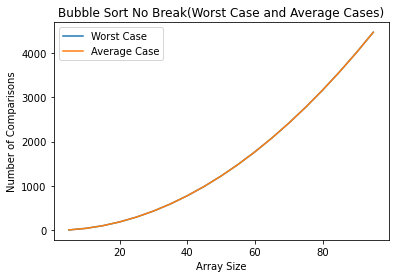

In [9]:
tests_BubbleSort(bubble_sort,False,'Bubble Sort No Break')

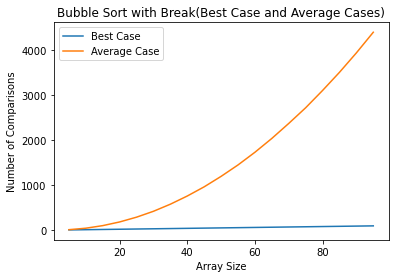

In [10]:
#use break with bubblesort. This is, if array is sorted stop executions
tests_BubbleSort(bubble_sort,True, 'Bubble Sort with Break')

----
### Merge Sort

In [11]:
#MERGE SORT
def merge_sort_recursive(a):
    
    if len(a) > 1:
        mid = len(a) // 2
        
        #rather than passing the lengths in we can just passes them as arrays split from the midpoint
        left = a[:mid]
        right = a[mid:]
        
        # recursively break down the arrays
        merge_sort_recursive(left)
        merge_sort_recursive(right)
        merge(a,left,right)
    #return the sorted array and the global counter
    return count
    #return[a,count]

In [12]:
#merge algorithm 
def merge(a,left,right):
        i=j=k=0 # index for left array, index for right array,index for merged array
        #count = 0
        global count #declare global counter
        # while both arrays have content
        while i < len(left) and j < len(right):
            #count comparison
            count+=1

            if left[i] < right[j]:
                a[k] = left[i]
                i += 1
            else:
                a[k] = right[j]
                j += 1
            k += 1

        # left array still has values 
        while i < len(left):
            #count comparison
            count+=1
            a[k] = left[i]
            i += 1
            k += 1

        # right array still has values
        while j < len(right):
            #count comparison
            count+=1
            a[k] = right[j]
            j += 1
            k += 1

In [13]:
def merge_sort(a):
    #for some reason we are asked to have this caller function to the recusive function
    global count #declare counter
    count  = 0 #intiate counter 
    # Implement the code for merge sort
    # Use a function merge_sort_recursive to implement the recursive call
    # Be careful in counting number of comparisons since you should include comparisons in the merge part.
    # Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.
    return merge_sort_recursive(a)

In [14]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = merge_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  34
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity Analysis of Merge Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __


Merge sort in all cases returns the same time complexity as it must iterate through all of the elements in the array and the divide and conquer requires log(n) steps. Therefore, with mergsort we get a time complexity of $\Theta(nlog(n))$ in worst, best and average case. 

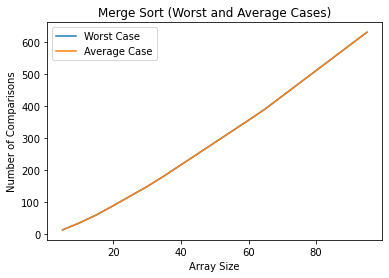

In [15]:
tests(merge_sort,'Merge Sort')

----
### Quick Sort


In [16]:
def quick_sort_recursive(a, first, last):
    if first < last:
        # calculate the split point
        pivotIdx = lomuto_partition(a, first, last)

        # now sort the two partitions
        quick_sort_recursive(a, first, pivotIdx-1)
        quick_sort_recursive(a, pivotIdx+1, last)
    return comparisons
    #return [a,comparisons]

In [17]:
#Lomuto Partitioning
def lomuto_partition(a,first,last):
    x = a[last] #start at last element for pivot
    
    #start j at 1 and i at 0
    i = first -1

    for j in range(first,last,1):
        
        global comparisons
        comparisons += 1
        
        if a[j]< x:
            
            temp = a[i+1]
            a[i+1] = a[j]
            a[j] = temp 
            i += 1
            #print(i,j)
            #print(a)

    temp = a[i+1]
    a[i+1] = a[last]
    a[last] = temp 
    #print(a)

    return i+1

In [18]:
#def quick_sort(a):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
#    return # you can implement it how you wish

#implement helper function to start the recursive calls for testing 
def quick_sort(a):
    
    global comparisons 
    comparisons = 0
    
    first = 0
    last = len(a)-1
    
    return quick_sort_recursive(a,first,last)

In [19]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = quick_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  26
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity Analysis of Quick Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

Worst case occurs when the pivot chosen places one element into a partition and all the other elements in the other partition. This occurs when either the largest or smallest element is selected as the pivot and the array is sorted. This will result in $\Theta(N^2)$ time complexity. So the way I have written the partion algorthim the worst case occurs when the array is in sorted on ascending order as I have the pivot set to be the last element in the array. This will always provide the worst case as the array is sorted and we pick the last or largest element in the array creating the scenario for the worst case partioning descirbed above. However, if the array is not sorted then on average the last element is not the smallest or largest and we get decent partions which then provides a time complexity of $\Theta(nlog(n))$.

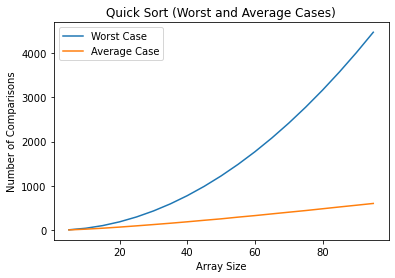

In [20]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
tests(quick_sort,'Quick Sort')

-----
## Testing Code: Do not edit



In [21]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [22]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [23]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [24]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [25]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
